# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min, norm, geom, uniform, lognorm
from scipy.linalg import solve

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/week_02_tutorial


# Import data


In [3]:
# Load input data, stock-driven model:
# and check your data

file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="stock_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    61 non-null     int64  
 2   inflow   0 non-null      float64
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,20,NaN,NaN
1991,21,NaN,NaN
1992,30,NaN,NaN
1993,39,NaN,NaN
1994,45,NaN,NaN
...,...,...,...
2046,724,NaN,NaN
2047,737,NaN,NaN
2048,750,NaN,NaN


In [5]:
data_length = data.shape[0]
timesteps = np.arange(0, data_length)

# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


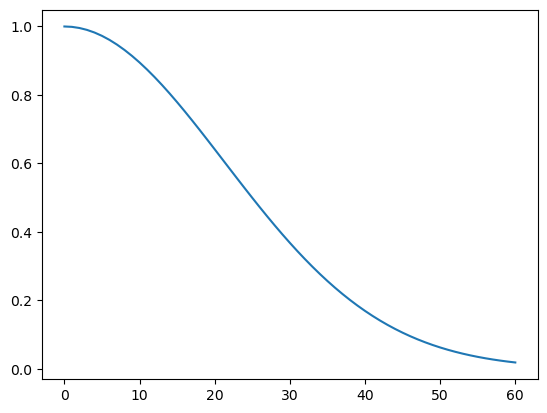

In [6]:
# Weibull distribution
survival_curve = weibull_min.sf(timesteps, c=2, loc=0, scale=30)

plt.plot(survival_curve)
plt.show()

# Create a survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [7]:
# create survival curve matrix filled with zeros
survival_curve_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for step in timesteps:
    # at each iteration, we shift the survival curve
    shifted_survival_curve = survival_curve[0 : data_length - step]
    # and we fill the survival curve matrix with the shifted survival curve
    survival_curve_matrix.loc[step:data_length, step] = shifted_survival_curve

survival_curve_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,0.085911,...,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.00000,0.0
57,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,...,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.00000,0.0
58,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,...,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.00000,0.0
59,0.020905,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,...,0.931358,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.00000,0.0


# Stock driven model


In [8]:
# This is our model input (together with the survival_curve_matrix)
stock = data["stock"]
stock

year
1990     20
1991     21
1992     30
1993     39
1994     45
       ... 
2046    724
2047    737
2048    750
2049    763
2050    776
Name: stock, Length: 61, dtype: int64

The stock-driven equation is:

$$
\textcolor{#20B2AA}{\text{inflow}(y)} = \frac{\textcolor{#DAA520}{\text{stock}(y)} - \sum_{t=y_0}^{y-1} [\textcolor{#20B2AA}{\text{inflow}(t)} \times \textcolor{#9370DB}{\text{surv}(y-t)]}}{\textcolor{#9370DB}{\text{surv}(0)}}
$$


If we remember that:

- $\textcolor{#9370DB}{\text{surv}(0)}$ is also the value on the diagonal of the `survival_curve_matrix`,
- $\textcolor{#20B2AA}{\text{inflow}(t)} \times \textcolor{#9370DB}{\text{surv}(y-t)]} = \text{cohort}(t)$

and using pandas notation we get:

$$
\textcolor{#20B2AA}{\text{inflow.iloc}[y]} = \frac{\textcolor{#DAA520}{\text{stock.iloc}[y]} - \sum_{t=0}^{y-1}  \textcolor{#38761d}{\text{cohort\_matrix.loc}[y, t]}}{\textcolor{#9370DB}{\text{survival\_curve\_matrix.iloc}[y, y]}}
$$


$$
\textcolor{#20B2AA}{\text{inflow.iloc}[y]} = \frac{\textcolor{#DAA520}{\text{stock.iloc}[y]} - \textcolor{#38761d}{\text{cohort\_matrix.loc}[y, :y-1]}\text{.sum()} }{\textcolor{#9370DB}{\text{survival\_curve\_matrix.iloc}[y, y]}}
$$


## Inflows and cohort matrix


In [9]:
# create inflow series and survival matrix filled with zeros
inflows = pd.Series(0, index=years, dtype=float)
cohort_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populating them
for step in timesteps:
    # we calculate the inflow of the step-th year
    surv0 = survival_curve_matrix.loc[step, step]
    inflows.iloc[step] = (stock.iloc[step] - cohort_matrix.loc[step, : step - 1].sum()) / surv0
    # and we scale the shifted survival curve with the inflow
    cohort_matrix.loc[:, step] = survival_curve_matrix.loc[:, step] * inflows.iloc[step]

cohort_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19.977790,1.022210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,19.911308,1.021075,9.067617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19.800997,1.017677,9.057547,9.123779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,19.647586,1.012039,9.027406,9.113647,6.199322,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.613416,0.035467,0.355123,0.402433,0.307277,0.294029,0.086590,0.104081,3.757512,1.182572,...,31.436844,32.224710,32.951373,33.612175,34.202844,34.719544,0.000000,0.000000,0.000000,0.000000
57,0.541037,0.031352,0.314616,0.357323,0.273441,0.262234,0.077398,0.093239,3.373596,1.064108,...,31.054954,31.904069,32.696079,33.425958,34.089025,34.680988,35.197997,0.000000,0.000000,0.000000
58,0.476139,0.027653,0.278111,0.316565,0.242790,0.233357,0.069029,0.083341,3.022182,0.955385,...,30.609607,31.516503,32.370747,33.166987,33.900166,34.565578,35.158910,35.676297,0.000000,0.000000
59,0.418095,0.024336,0.245296,0.279834,0.215096,0.207199,0.061427,0.074329,2.701364,0.855866,...,30.103674,31.064537,31.977513,32.836970,33.637521,34.374079,35.041909,35.636679,36.154505,0.000000


![filling_stock_driven_cohort_matrix](../img/filling_stock_driven_cohort.png)

$$
\textcolor{#20B2AA}{\text{inflow.iloc}[y]} = \frac{\textcolor{#DAA520}{\text{stock.iloc}[y]} - \sum_{t=0}^{y-1}  \textcolor{#38761d}{\text{cohort}\textunderscore\text{matrix.loc}[y, t]}}{\textcolor{#9370DB}{\text{survival}\textunderscore\text{curve}\textunderscore\text{matrix.iloc}[y, y]}}
$$


<Axes: xlabel='year', ylabel='year'>

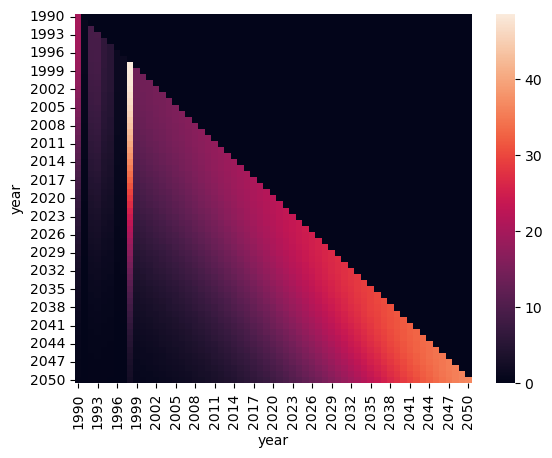

In [10]:
# set index and columns to years instead of timesteps
cohort_matrix.index = years
cohort_matrix.columns = years

# and visualize the cohort_matrix matrix with a heatmap
sns.heatmap(cohort_matrix, annot=False)

## Net addition to stock


$$\text{NAS}(y) = \text{stock}(y) - \text{stock}(y-1)$$


In [11]:
# calculate the net addition to stock
nas = np.diff(stock, prepend=0)  # prepending 0 assumes no initial stock
nas

array([20,  1,  9,  9,  6,  5,  1,  1, 48, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

## Outflows


$$\text{outflow}(y) = \text{inflow}(y) - \text{NAS}(y)$$


In [12]:
# calculate outflows and nas:
outflows = inflows - nas
outflows

year
1990     0.000000
1991     0.022210
1992     0.067617
1993     0.123779
1994     0.199322
          ...    
2046    21.719544
2047    22.197997
2048    22.676297
2049    23.154505
2050    23.632675
Length: 61, dtype: float64

## Putting it together


In [ ]:
# The input for the stock-driven model
stock = data["stock"]

# create inflow series and survival matrix filled with zeros
inflows = pd.Series(0, index=years, dtype=float)
cohort_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populating them
for step in timesteps:
    # we calculate the inflow of the step-th year
    inflows.iloc[step] = (stock.iloc[step] - cohort_matrix.loc[step, : step - 1].sum()) / survival_curve_matrix.loc[step, step]
    # and we scale the shifted survival curve with the inflow
    cohort_matrix.loc[:, step] = survival_curve_matrix.loc[:, step] * inflows.iloc[step]

# set index and columns to years instead of timesteps
cohort_matrix.index = years
cohort_matrix.columns = years

# Compute nas, and outflows
data["inflow"] = inflows
data["nas"] = np.diff(data["stock"], prepend=0)
data["outflow"] = data["inflow"] - data["nas"]

data

,stock,inflow,outflow,nas
year,,,,
1990,20,20.000000,0.000000,20
1991,21,1.022210,0.022210,1
1992,30,9.067617,0.067617,9
1993,39,9.123779,0.123779,9
1994,45,6.199322,0.199322,6
...,...,...,...,...
2046,724,34.719544,21.719544,13
2047,737,35.197997,22.197997,13
2048,750,35.676297,22.676297,13


# Visualize the results


<Axes: xlabel='year'>

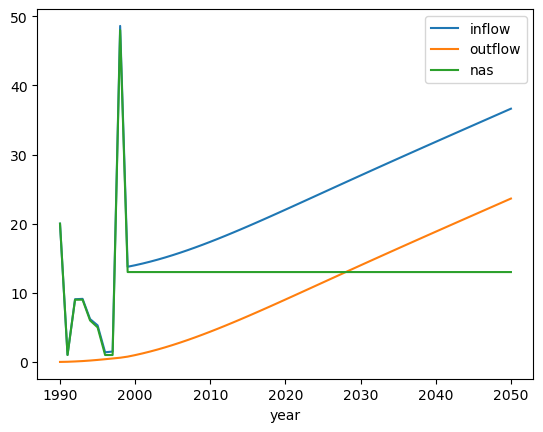

In [14]:
# Plot the evolution of the inflows, outflows and net addition to stock over time
data[["inflow", "outflow", "nas"]].plot()

<Axes: xlabel='year'>

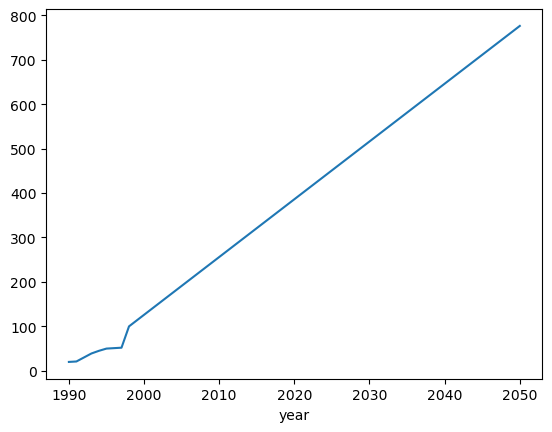

In [15]:
# Plot the evolution of the stock over time
data["stock"].plot()

<Axes: xlabel='year'>

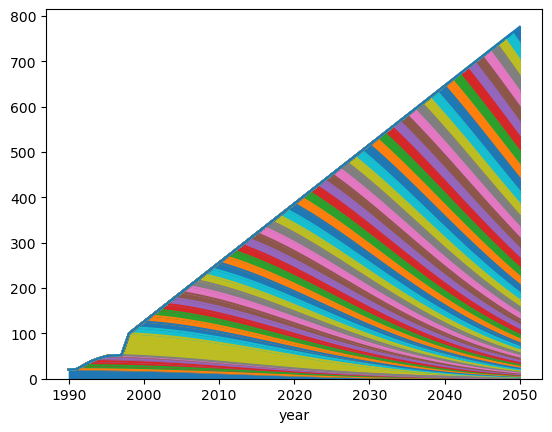

In [16]:
# Visualize the stock by cohort_matrixs
cohort_matrix.plot(kind="area", stacked=True, legend=False)

# Export output data to Excel


In [17]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data_output" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="stock_driven")

In [18]:
# But we also want to save the cohort_matrix data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort_matrix.to_excel(writer, sheet_name="cohort_matrix_stock_driven")

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
